In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats

In [3]:
### Path to data
exp1_path = '../data/Exp 1/data/cleaned/'
exp2a_path = '../data/Exp 2a/data/cleaned/'
exp2b_path = '../data/Exp 2b/data/cleaned/'
excluded_files = pd.read_csv('../data/excluded_files_cleaned.csv')['f_name'].drop_duplicates().to_list()

RT of boundary vs non boundary items

In [4]:
def get_rt_by_trial_type(df, exp_num):
    """Get boundary items from df"""
    df = df.copy()
    if exp_num == 1:
        unpredictable_boundary_rt = df[(df['clock'] == 'clockno_up.jpg')]['key_resp.rt'].mean()
        unpredictable_nonboundary_rt = df[(df['clock'] == 'clockno_default.jpg')]['key_resp.rt'].mean()
        
        df['shifted_clock'] = df['clock'].shift(-1)
        mask = (df['clock'] == 'clockno_up.jpg') & (df['shifted_clock'] != 'clockno_up.jpg')
        unpredictable_second_item_rt = df.loc[mask.shift().fillna(False), 'key_resp.rt'].mean()

        predictable_boundary_rt = df[(df['clock'] == 'clock_5_1.png') | (df['clock'] == 'clock_6_1.png') | (df['clock'] == 'clock_7_1.png')]['key_resp.rt'].mean()
        predictable_nonboundary_rt = df[(df['clock'] != 'clock_5_1.png') & (df['clock'] != 'clock_6_1.png') & (df['clock'] != 'clock_7_1.png')]['key_resp.rt'].mean()
        predictable_second_item_rt = df[(df['clock'] == 'clock_5_2.png') | (df['clock'] == 'clock_6_2.png') | (df['clock'] == 'clock_7_2.png')]['key_resp.rt'].mean()

        return unpredictable_boundary_rt, unpredictable_nonboundary_rt, unpredictable_second_item_rt, predictable_boundary_rt, predictable_nonboundary_rt, predictable_second_item_rt
    elif exp_num == 2:
        boundary_rt = df[(df['clock'] == 'Blue.png')]['key_resp.rt'].mean()
        nonboundary_rt = df[(df['clock'] != 'Blue.png')]['key_resp.rt'].mean()
        second_item_rt = df[(df['clock'] == 'Purple.png')]['key_resp.rt'].mean()
        return boundary_rt, nonboundary_rt, second_item_rt
    elif exp_num == 3:
        start_index = df.index[df['key_resp_23.rt'] > 0][0]
        df = df[start_index:]
        boundary_rt = df[(df['clock'] == 'Blue.png')]['key_resp.rt'].mean()
        nonboundary_rt = df[(df['clock'] != 'Blue.png')]['key_resp.rt'].mean()
        second_item_rt = df[(df['clock'] == 'Purple.png')]['key_resp.rt'].mean()
        return boundary_rt, nonboundary_rt, second_item_rt


In [5]:
exp1_data = sorted(glob.glob(exp1_path + '*.csv'))
unpredictable_boundary = []
unpredictable_nonboundary = []
unpredictable_second_item = []
predictable_boundary = []
predictable_nonboundary = []
predictable_second_item = []

subjects = []
for file in exp1_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)
        unpredictable_boundary_rt, unpredictable_nonboundary_rt, unpredictable_second_item_rt, predictable_boundary_rt, predictable_nonboundary_rt, predictable_second_item_rt = get_rt_by_trial_type(pd.read_csv(file), 1)
        unpredictable_boundary.append(unpredictable_boundary_rt)
        unpredictable_nonboundary.append(unpredictable_nonboundary_rt)
        unpredictable_second_item.append(unpredictable_second_item_rt)
        predictable_boundary.append(predictable_boundary_rt)
        predictable_nonboundary.append(predictable_nonboundary_rt)
        predictable_second_item.append(predictable_second_item_rt)
exp1_results_df = pd.DataFrame({'subject':subjects, 'unpredictable_boundary_rt':unpredictable_boundary, 'unpredictable_nonboundary_rt':unpredictable_nonboundary,
                                'unpredictable_second_item_rt':unpredictable_second_item, 'predictable_boundary_rt':predictable_boundary, 
                                'predictable_nonboundary_rt':predictable_nonboundary, 'predictable_second_item_rt':predictable_second_item
})
print('Number of subjects: ', len(subjects))
exp1_results_df.to_csv('exp1_boundary_rt_results.csv', index=False)

Number of subjects:  71


In [6]:
exp2a_data = sorted(glob.glob(exp2a_path+'*.csv'))
background_boundary = []
background_nonboundary = []
background_second_item = []
nback_boundary = []
nback_nonboundary = []
nback_second_item = []
subjects = []
segment_count = 0
nback_count = 0
for file in exp2a_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)
        if 'task-background' in file:
            df = pd.read_csv(file)
            boundary_rt, nonboundary_rt, second_item_rt = get_rt_by_trial_type(df, 2)
            background_boundary.append(boundary_rt)
            background_nonboundary.append(nonboundary_rt)
            background_second_item.append(second_item_rt)
            nback_boundary.append(np.nan)
            nback_nonboundary.append(np.nan)
            nback_second_item.append(np.nan)
            segment_count += 1

        else:
            df = pd.read_csv(file)
            boundary_rt, nonboundary_rt, second_item_rt = get_rt_by_trial_type(df, 2)
            nback_boundary.append(boundary_rt)
            nback_nonboundary.append(nonboundary_rt)
            nback_second_item.append(second_item_rt)
            background_boundary.append(np.nan)
            background_nonboundary.append(np.nan)
            background_second_item.append(np.nan)
            nback_count += 1

exp2a_results_df = pd.DataFrame({'subject':subjects, 'background_boundary_rt':background_boundary, 'background_nonboundary_rt':background_nonboundary,
                                'background_second_item_rt':background_second_item, 'nback_boundary_rt':nback_boundary, 'nback_nonboundary_rt':nback_nonboundary,
                                'nback_second_item_rt':nback_second_item})
print('Number of participants in background task: ', segment_count)
print('Number of participants in nback task: ', nback_count)
exp2a_results_df.to_csv('exp2a_boundary_rt_results.csv', index=False)

Number of participants in background task:  28
Number of participants in nback task:  46


In [7]:
exp2b_data = sorted(glob.glob(exp2b_path+'*.csv'))
background_boundary = []
background_nonboundary = []
background_second_item = []
nback_boundary = []
nback_nonboundary = []
nback_second_item = []
subjects = []
segment_count = 0
nback_count = 0
for file in exp2b_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)
        if 'task-background' in file:
            df = pd.read_csv(file)
            boundary_rt, nonboundary_rt, second_item_rt = get_rt_by_trial_type(df, 3)
            background_boundary.append(boundary_rt)
            background_nonboundary.append(nonboundary_rt)
            background_second_item.append(second_item_rt)
            nback_boundary.append(np.nan)
            nback_nonboundary.append(np.nan)
            nback_second_item.append(np.nan)
            segment_count += 1
        else:
            df = pd.read_csv(file)
            boundary_rt, nonboundary_rt, second_item_rt = get_rt_by_trial_type(df, 3)
            nback_boundary.append(boundary_rt)
            nback_nonboundary.append(nonboundary_rt)
            nback_second_item.append(second_item_rt)
            background_boundary.append(np.nan)
            background_nonboundary.append(np.nan)
            background_second_item.append(np.nan)
            nback_count += 1
exp2b_results_df = pd.DataFrame({'subject':subjects, 'background_boundary_rt':background_boundary, 'background_nonboundary_rt':background_nonboundary,
                                'background_second_item_rt':background_second_item, 'nback_boundary_rt':nback_boundary, 
                                'nback_nonboundary_rt':nback_nonboundary, 'nback_second_item_rt':nback_second_item})
exp2b_results_df.to_csv('exp2b_boundary_rt_results.csv', index=False)
print('Number of participants in background task: ', segment_count)
print('Number of participants in nback task: ', nback_count)

Number of participants in background task:  33
Number of participants in nback task:  42


In [8]:
#Exp 1 analysis
t_statistic, p_value = stats.ttest_rel(exp1_results_df['predictable_boundary_rt'], exp1_results_df['predictable_nonboundary_rt'])
# degrees of freedom
df = len(exp1_results_df) - 1
# effect size (Cohen's d)
diff = exp1_results_df['predictable_boundary_rt'] - exp1_results_df['predictable_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)
print('Predictable')
print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

t_statistic, p_value = stats.ttest_rel(exp1_results_df['unpredictable_boundary_rt'], exp1_results_df['unpredictable_nonboundary_rt'])
# degrees of freedom
df = len(exp1_results_df) - 1
# effect size (Cohen's d)
diff = exp1_results_df['unpredictable_boundary_rt'] - exp1_results_df['unpredictable_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)
print('Unpredictable')
print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')



Predictable
t(70) = 3.19, p = 0.002, d = 0.38
The mean difference is 0.04
The 95% confidence interval for the difference is (0.01, 0.06)
Unpredictable
t(70) = 6.88, p = 0.000, d = 0.82
The mean difference is 0.07
The 95% confidence interval for the difference is (0.05, 0.10)


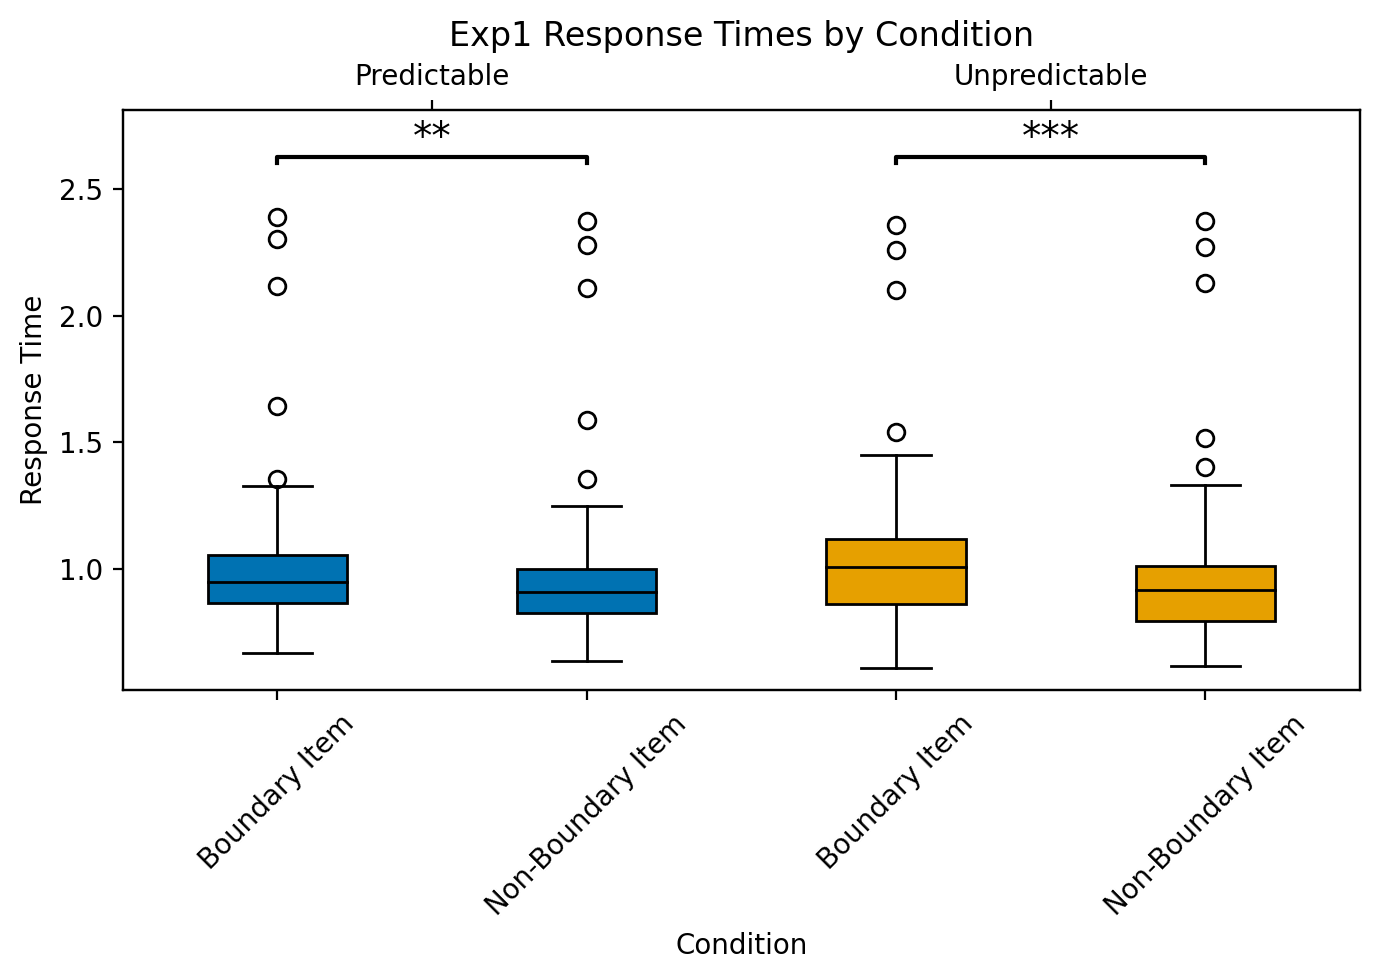

In [9]:
#Visualization
exp1_results_df.columns = exp1_results_df.columns.str.strip()

response_time_columns = ['predictable_boundary_rt', 'predictable_nonboundary_rt', 'unpredictable_boundary_rt', 'unpredictable_nonboundary_rt']
informative_names = ['Boundary Item', 'Non-Boundary Item', 'Boundary Item', 'Non-Boundary Item']

fig, ax = plt.subplots(figsize=(7,5), dpi=200)
bp = exp1_results_df[response_time_columns].boxplot(grid=False, vert=True, patch_artist=True, ax=ax, return_type='dict')

colors = ['#0072B2', '#0072B2', '#E6A000', '#E6A000']

for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
    box.set(edgecolor='black')

for median in bp['medians']:
    median.set(color='black', linewidth=1)

for whisker in bp['whiskers']:
    whisker.set(color='black')
for cap in bp['caps']:
    cap.set(color='black')

ax.set_xticklabels(informative_names, rotation=45)
ax.set_xlabel('Condition')
ax.set_ylabel('Response Time')
ax.set_title('Exp1 Response Times by Condition')

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([1.5, 3.5])
ax2.set_xticklabels(['Predictable', 'Unpredictable'])

y_max = ax.get_ylim()[1]

y_line = y_max * 1.05
y_text = y_max * 1.06  # Slightly above the line

ax.set_ylim(top=y_max * 1.135)

ax.plot([1, 1, 2, 2], [y_line, y_text, y_text, y_line], color="black")
ax.text(1.5, y_text, "**", ha='center', va='bottom', color='black', fontsize=14)

ax.plot([3, 3, 4, 4], [y_line, y_text, y_text, y_line], color="black")
ax.text(3.5, y_text, "***", ha='center', va='bottom', color='black', fontsize=14)

plt.tight_layout()
plt.show()

In [10]:
#Exp 2a
df_background = exp2a_results_df.dropna(subset=['background_boundary_rt', 'background_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_background['background_boundary_rt'], df_background['background_nonboundary_rt'])
# degrees of freedom
df = len(df_background) - 1
# effect size (Cohen's d)
diff = df_background['background_boundary_rt'] - df_background['background_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)
print('Background')
print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

df_2back = exp2a_results_df.dropna(subset=['nback_boundary_rt', 'nback_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_2back['nback_boundary_rt'], df_2back['nback_nonboundary_rt'])
# degrees of freedom
df = len(df_2back) - 1
# effect size (Cohen's d)
diff = df_2back['nback_boundary_rt'] - df_2back['nback_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)
ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)
print('nBack')
print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

Background
t(27) = 2.17, p = 0.039, d = 0.41
The mean difference is 0.03
The 95% confidence interval for the difference is (0.00, 0.07)
nBack
t(45) = 5.70, p = 0.000, d = 0.84
The mean difference is 0.05
The 95% confidence interval for the difference is (0.03, 0.07)


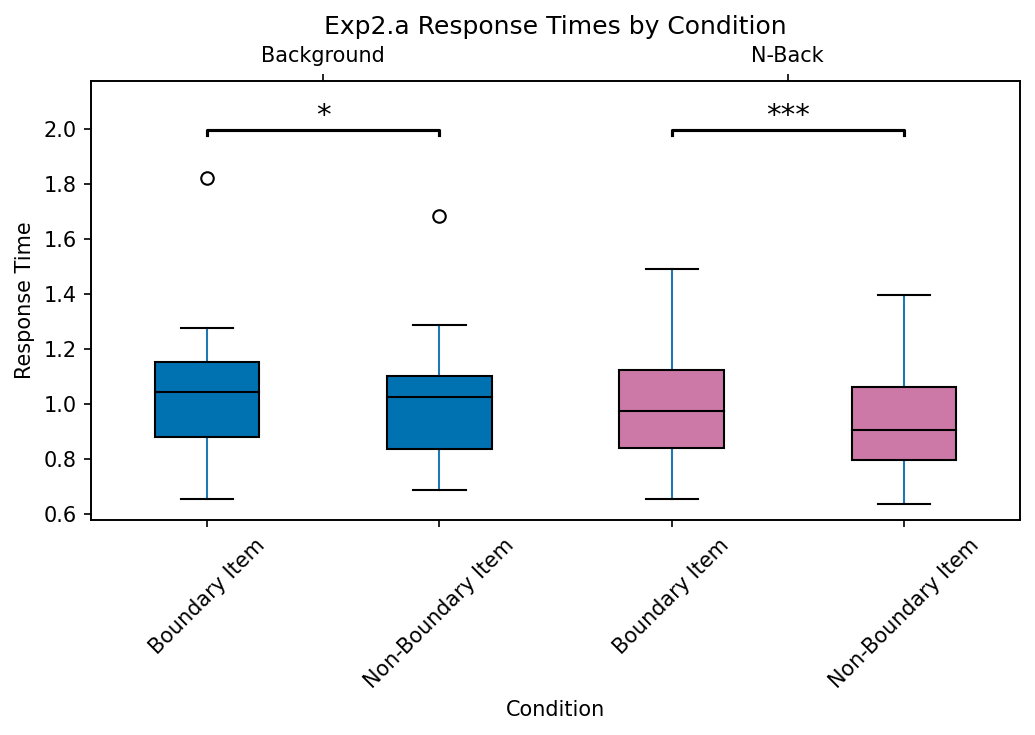

In [11]:
exp2a_results_df.columns = exp2a_results_df.columns.str.strip()

response_time_columns = ['background_boundary_rt', 'background_nonboundary_rt', 'nback_boundary_rt', 'nback_nonboundary_rt']

informative_names = ['Boundary Item', 'Non-Boundary Item', 'Boundary Item', 'Non-Boundary Item']

boxprops = {'edgecolor': 'black'} 
medianprops = {'color': 'black'} 

fig, ax = plt.subplots(figsize=(7,5), dpi=150)

box_plot = exp2a_results_df[response_time_columns].boxplot(grid=False, vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops, return_type='dict', ax=ax)

colors = ['#0072B2', '#0072B2', '#CC79A7', '#CC79A7']

for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(list(range(1, len(informative_names) + 1)), informative_names, rotation=45)
plt.xlabel('Condition')
plt.ylabel('Response Time')
plt.title('Exp2.a Response Times by Condition')

ax = plt.gca()
ax2 = ax.twiny()  
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks([1.5, 3.5])
ax2.set_xticklabels(['Background', 'N-Back'])

y_max = ax.get_ylim()[1]
y_line = y_max * 1.05
y_text = y_max * 1.06  # Slightly above the line

ax.set_ylim(top=y_max * 1.155) 
ax.plot([1, 1, 2, 2], [y_line, y_text, y_text, y_line], color="black")
ax.text(1.5, y_text, "*", ha='center', va='bottom', color='black', fontsize=14)
ax.plot([3, 3, 4, 4], [y_line, y_text, y_text, y_line], color="black")
ax.text(3.5, y_text, "***", ha='center', va='bottom', color='black', fontsize=14)

plt.tight_layout()
plt.show()


In [16]:
df_background = exp2b_results_df.dropna(subset=['background_boundary_rt', 'background_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_background['background_boundary_rt'], df_background['background_nonboundary_rt'])
print(f'The t-statistic is {t_statistic} and the p-value is {p_value}')

# degrees of freedom
df = len(df_background) - 1

# effect size (Cohen's d)
diff = df_background['background_boundary_rt'] - df_background['background_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std

mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)

ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)

print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

df_2back = exp2b_results_df.dropna(subset=['nback_boundary_rt', 'nback_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_2back['nback_boundary_rt'], df_2back['nback_nonboundary_rt'])
print(f'The t-statistic is {t_statistic} and the p-value is {p_value}')
# degrees of freedom
df = len(df_2back) - 1

# effect size (Cohen's d)
diff = df_2back['nback_boundary_rt'] - df_2back['nback_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)

ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)

print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

The t-statistic is 4.021322395052557 and the p-value is 0.00032985434729655716
t(32) = 4.02, p = 0.000, d = 0.70
The mean difference is 0.06
The 95% confidence interval for the difference is (0.03, 0.08)
The t-statistic is 4.647613422108601 and the p-value is 3.457229783408768e-05
t(41) = 4.65, p = 0.000, d = 0.72
The mean difference is 0.04
The 95% confidence interval for the difference is (0.02, 0.06)


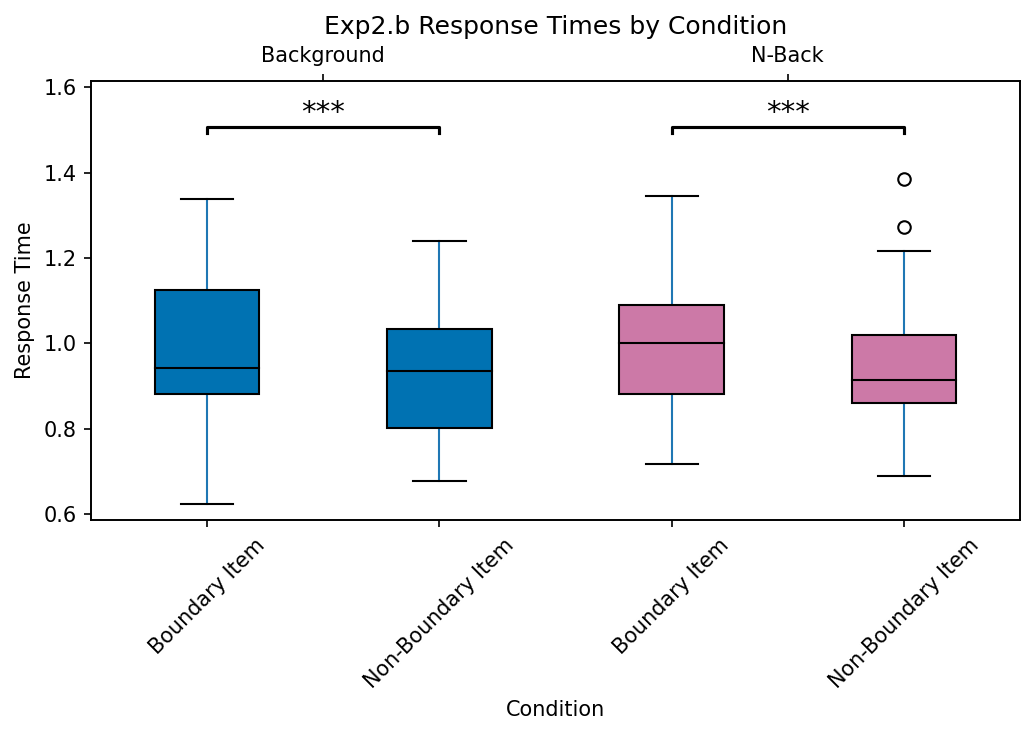

In [15]:
exp2b_results_df.columns = exp2b_results_df.columns.str.strip()

# Define the columns that contain response times
response_time_columns = ['background_boundary_rt', 'background_nonboundary_rt', 'nback_boundary_rt', 'nback_nonboundary_rt']

# Define more informative names for the x-axis
informative_names = ['Boundary Item', 'Non-Boundary Item', 'Boundary Item', 'Non-Boundary Item']

# Set properties for box plot
boxprops = {'edgecolor': 'black'}  # Make the box borders black
medianprops = {'color': 'black'}  # Make the median line inside the box black

# Create a new figure and axis with the desired figsize and dpi
fig, ax = plt.subplots(figsize=(7,5), dpi=150)

# Plot boxplots for each condition
box_plot = exp2b_results_df[response_time_columns].boxplot(grid=False, vert=True, patch_artist=True, boxprops=boxprops, medianprops=medianprops, return_type='dict', ax=ax)

# Assign colors based on condition
colors = ['#0072B2', '#0072B2', '#CC79A7', '#CC79A7']

# Adjust the color of the boxplots
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Set the new x-axis labels for primary axis
plt.xticks(list(range(1, len(informative_names) + 1)), informative_names, rotation=45)

plt.xlabel('Condition')
plt.ylabel('Response Time')
plt.title('Exp2.b Response Times by Condition')

# Create secondary x-axis for main categories
ax = plt.gca()
ax2 = ax.twiny()  
ax2.set_xlim(ax.get_xlim())  # Set secondary x-axis limits to be the same as primary x-axis
ax2.set_xticks([1.5, 3.5])  # Set tick positions to be between the subcategories
ax2.set_xticklabels(['Background', 'N-Back'])  # Set tick labels for the main categories

# Get the current maximum y-value of the plot
y_max = ax.get_ylim()[1]

# Determine y-positions for the line and asterisk
y_line = y_max * 1.05
y_text = y_max * 1.06  # Slightly above the line

# Adjust the y-axis limits
ax.set_ylim(top=y_max * 1.135)  # Adjust to make room for the asterisk and line

# Draw the lines connecting the boxes and the asterisk
ax.plot([1, 1, 2, 2], [y_line, y_text, y_text, y_line], color="black")
ax.text(1.5, y_text, "***", ha='center', va='bottom', color='black', fontsize=14)

# Draw the lines connecting the boxes and the asterisk
ax.plot([3, 3, 4, 4], [y_line, y_text, y_text, y_line], color="black")
ax.text(3.5, y_text, "***", ha='center', va='bottom', color='black', fontsize=14)

plt.tight_layout()
plt.show()


In [17]:
exp2a_exp2b_df = exp2a_results_df.append(exp2b_results_df, ignore_index=True)


df_background = exp2a_exp2b_df.dropna(subset=['background_boundary_rt', 'background_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_background['background_boundary_rt'], df_background['background_nonboundary_rt'])
print(f'The t-statistic is {t_statistic} and the p-value is {p_value}')

# degrees of freedom
df = len(df_background) - 1

# effect size (Cohen's d)
diff = df_background['background_boundary_rt'] - df_background['background_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std

mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)

ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)

print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

df_2back = exp2a_exp2b_df.dropna(subset=['nback_boundary_rt', 'nback_nonboundary_rt'])
t_statistic, p_value = stats.ttest_rel(df_2back['nback_boundary_rt'], df_2back['nback_nonboundary_rt'])
print(f'The t-statistic is {t_statistic} and the p-value is {p_value}')
# degrees of freedom
df = len(df_2back) - 1

# effect size (Cohen's d)
diff = df_2back['nback_boundary_rt'] - df_2back['nback_nonboundary_rt']
diff_std = np.std(diff, ddof=1)  # ddof=1 for sample standard deviation
d = diff.mean() / diff_std
mean_diff = np.mean(diff)
std_err_diff = stats.sem(diff)

ci_low, ci_upp = stats.t.interval(0.95, len(diff)-1, loc=mean_diff, scale=std_err_diff)

print(f't({df}) = {t_statistic:.2f}, p = {p_value:.3f}, d = {d:.2f}')
print(f'The mean difference is {mean_diff:.2f}')
print(f'The 95% confidence interval for the difference is ({ci_low:.2f}, {ci_upp:.2f})')

The t-statistic is 4.392125455313983 and the p-value is 4.636911239545301e-05
t(60) = 4.39, p = 0.000, d = 0.56
The mean difference is 0.05
The 95% confidence interval for the difference is (0.02, 0.07)
The t-statistic is 7.3565332428675045 and the p-value is 9.855989924790031e-11
t(87) = 7.36, p = 0.000, d = 0.78
The mean difference is 0.05
The 95% confidence interval for the difference is (0.03, 0.06)
